In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.constants as const

# Ionization of atoms by intense laser pulses

In Laser Plasma Acceleration(LPA) ionization is used to convert regular matter (solid or gas) to a plasma. 
In Laser Wakefield Acceleration (LWFA), the driver laser pulse can be used to directly create a plasma in its wake. 
Special injection methods, so called ionization-injection methods, are used in LWFA to inject electrons into the accelerating plasma cavity. 
Thus, understanding ionization is essential for LPA. 

To model ionization processes, particle-in-cell codes are extended via various ionization models, like field- or collisional-ionization. 
Modeling ionization by laser pulses is treated by field-ionization methods lake Barrier Suppression Ionization (BSI) or tunneling ionization models like (ADK). 

## Laser model

In [2]:
z = np.linspace(-5e-6, 20.e-6, 2000) # position [m] 0µm-50µm
t = np.linspace(0.0, 100e-15, 1500) # time [s] 0fs-200fs

In [3]:
def laser(z, t, E=1.0, tau=10.0e-15, lambda_0=800.0e-9):
    return E * np.exp(-0.5 * ((z/const.c - t)/tau)**2) * np.sin((z - t * const.c) / lambda_0 * 2 * np.pi)

In [4]:
E_over_time = laser(z[:, np.newaxis], t[np.newaxis, :])

Plot space-time diagram of laser electric field strength. 

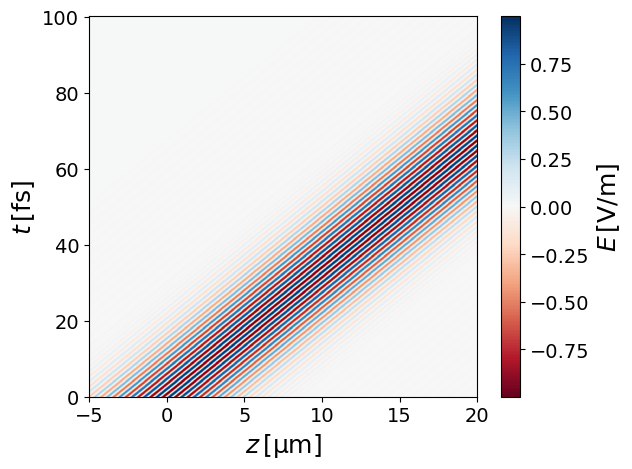

In [5]:
plt.pcolormesh(z/1e-6, t/1e-15, E_over_time.T, cmap=plt.cm.RdBu)

cb = plt.colorbar()

plt.xlabel(r"$z \, \mathrm{[\mu m]}$", fontsize=18)
plt.xticks(fontsize=14)

plt.ylabel(r"$t \, \mathrm{[fs]}$", fontsize=18)
plt.yticks(fontsize=14)

cb.set_label(r"$E \, \mathrm{[V/m]}$", fontsize=18)
for i in cb.ax.get_yticklabels():
    i.set_fontsize(14)
    
plt.tight_layout()
plt.show()

# BSI - Barrier Suppression Ionization

This is a classical picture of ionization where electrons, have a specific energy (determined by quantum mechanics), are trapped in the potential of the nuclei and are only freed if an external electric field is applied that bends the potential in such a way that one side of the barrier becomes smaller than the electron energy. 

The combined potential of the atom's nuclei and the external electric field can be described as:
$$ \Phi(x) = - \frac{Z \cdot q_e^2}{4 \pi \varepsilon_0 \left| x \right|} - q_e \cdot E_x^{\mathrm{ext}} \cdot x $$